In [4]:
import psycopg2
foo = 'bar';
try:
    dbConnection = psycopg2.connect(user = "postgres",
    password = "postgres",
    host = "localhost",
    port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE weather;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

Error while connecting to PostgreSQL database "weather" already exists



In [19]:
createString = """
CREATE TABLE weather(
date_time timestamp PRIMARY KEY,
rain numeric(5,1),
temp numeric(5,1),
wetb numeric(5,1),
dewpt numeric(5,1),
vapps numeric(5,1),
rhum numeric(5,1),
msl numeric(7,1),
wdsp integer,
wddir integer,
ww integer,
w integer,
sun numeric(5,1),
vis integer,
clht integer,
clamt integer
);
"""

try:
    dbConnection = psycopg2.connect(user = "postgres",
        password = "postgres",
        host = "localhost",
        port = "5432",
        database = "weather")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

In [25]:
import psycopg2
import csv
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "postgres",
        host = "localhost",
        port = "5432",
        database = "weather")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("SET DateStyle='DMY'")
    insertString = "INSERT INTO weather VALUES ('{}',"+"{},"*14+"{})"
    with open('weather.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

In [27]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
sql = """
    SELECT
    EXTRACT(MONTH FROM date_time) AS month,
    AVG(temp) as temp,
    AVG(wdsp) AS wdsp
    FROM
    weather
    GROUP BY
    month;"""
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "postgres",
        host = "localhost",
        port = "5432",
        database = "weather")
    weather_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection):
        dbConnection.close()
print(weather_dataframe)

    month       temp      wdsp
0     2.0   5.231678  2.000000
1     9.0  13.011500  2.001667
2    11.0   7.322407  2.000000
3    12.0   5.892727  2.000000
4     7.0  15.414274  2.000000
5     3.0   6.100524  2.002151
6     4.0   8.088000  1.999722
7    10.0  10.680484  2.000000
8     8.0  14.676667  2.000000
9     5.0  10.867245  2.000000
10    6.0  13.610611  2.000000
11    1.0   5.047258  2.000000


/var/folders/j4/7yvq0bcx06v1fs4_rz4y8xbm0000gn/T/ipykernel_15404/3121102505.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  weather_dataframe = sqlio.read_sql_query(sql, dbConnection)


<AxesSubplot: xlabel='month', ylabel='temp'>

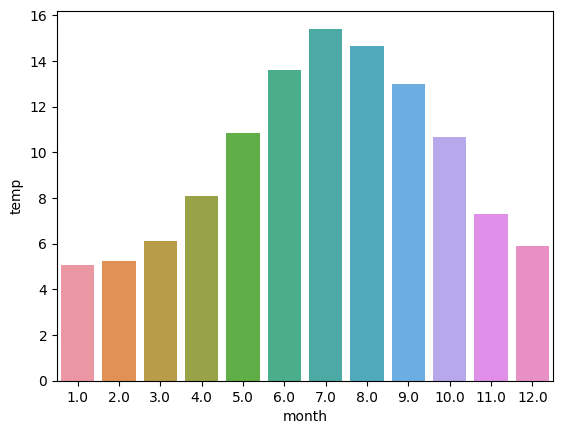

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="month", y="temp", data=weather_dataframe)